In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [7]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

In [11]:
df= df.assign(
second = df.pickup_datetime.dt.second,
minute = df.pickup_datetime.dt.minute,
hour = df.pickup_datetime.dt.hour,
day= df.pickup_datetime.dt.day,
month = df.pickup_datetime.dt.month,
year = df.pickup_datetime.dt.year,
dayofweek = df.pickup_datetime.dt.dayofweek
)
df = df.drop('pickup_datetime',axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   second             199999 non-null  int32  
 7   minute             199999 non-null  int32  
 8   hour               199999 non-null  int32  
 9   day                199999 non-null  int32  
 10  month              199999 non-null  int32  
 11  year               199999 non-null  int32  
 12  dayofweek          199999 non-null  int32  
dtypes: float64(5), int32(7), int64(1)
memory usage: 16.0 MB


In [13]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,6,52,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,56,4,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,45,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,21,22,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,0,47,17,28,8,2014,3


In [14]:
incorrect_coordinates = df.loc[
(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
(df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
(df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
(df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
]
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [24]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    long1, lati1, long2, lati2 = map(np.radians, [longitude1, latitude1, longitude2, latitude2])
    dist_long = long2- long1
    dist_lati = lati2 - lati1
    a = np.sin(dist_lati/2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) * 6371
# long1,lati1,long2,lati2 = longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]
# c = sqrt((long2 - long1) ** 2 + (lati2 - lati1) ** 2)asin
    return c

In [25]:
df['Distance'] = distance_transform(
df['pickup_longitude'],
df['pickup_latitude'],
df['dropoff_longitude'],
df['dropoff_latitude']
)

In [26]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,6,52,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,56,4,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,45,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,21,22,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,0,47,17,28,8,2014,3,4.475450


Text(0, 0.5, 'fare_amount')

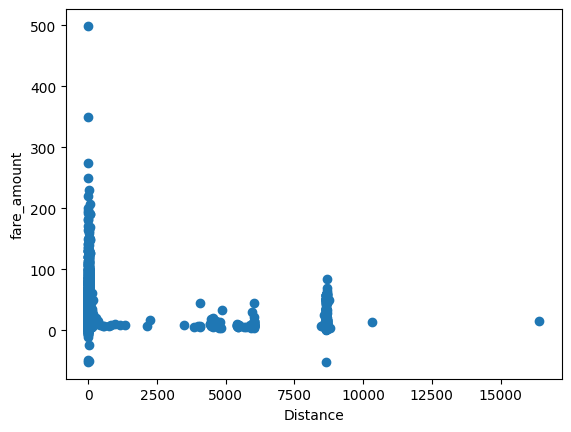

In [27]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

<Axes: >

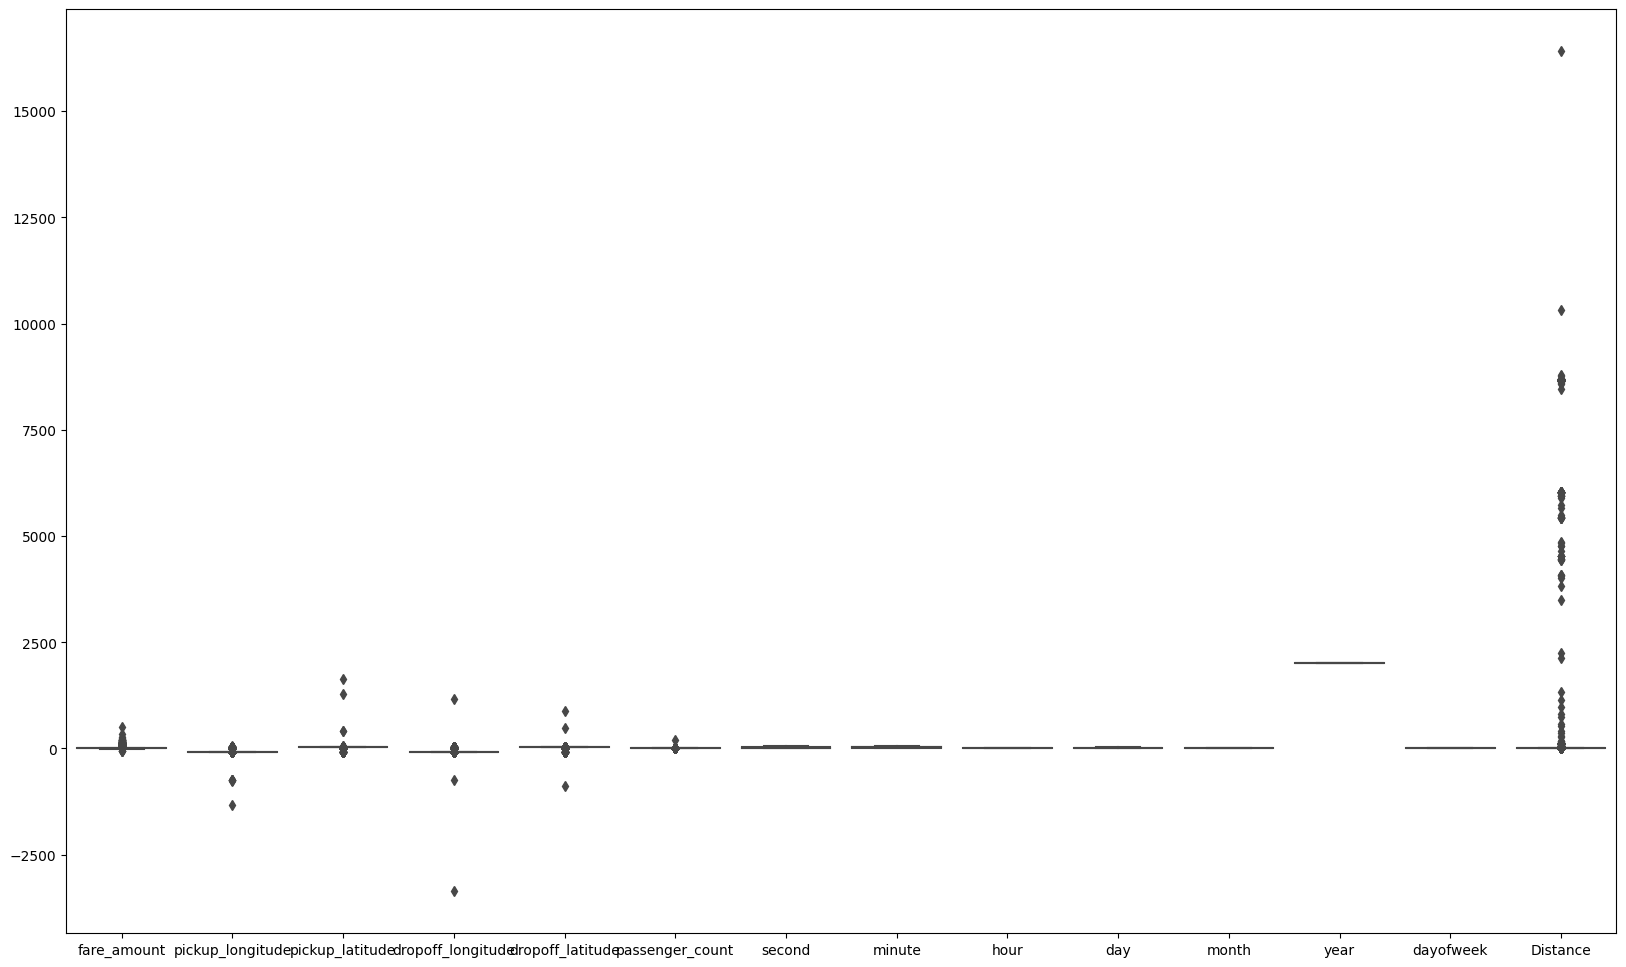

In [28]:
plt.figure(figsize=(20,12))
sns.boxplot(data = df)

$$\geqslant$$

In [40]:
df.drop(df[df['Distance'] >= 60].index, inplace = True)
df.drop(df[df['fare_amount'] >= 0].index, inplace = True)
df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )

Text(0, 0.5, 'fare_amount')

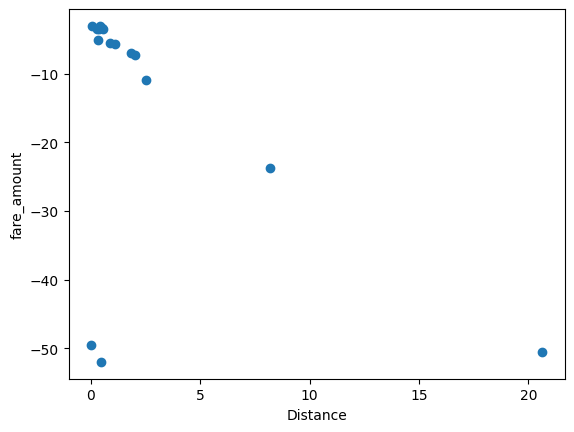

In [41]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [43]:
corr = df.corr()
corr.style.background_gradient(cmap='BuGn')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,Distance
fare_amount,1.000000,-0.484829,0.314670,0.150563,-0.060070,-0.854445,0.220307,0.275862,-0.005416,-0.331652,0.209521,0.275037,0.222393,-0.511019
pickup_longitude,-0.484829,1.000000,-0.609188,0.268500,0.247900,0.197244,-0.233238,-0.139431,0.009704,0.150538,-0.211589,-0.480095,-0.330533,0.945423
pickup_latitude,0.314670,-0.609188,1.000000,0.215424,0.347808,-0.082158,0.086360,0.212434,-0.017193,-0.424684,-0.160490,-0.052220,0.028056,-0.672060
dropoff_longitude,0.150563,0.268500,0.215424,1.000000,0.771821,-0.163122,-0.096980,-0.096836,0.296486,-0.243568,-0.246070,-0.393307,-0.403248,-0.005870
dropoff_latitude,-0.060070,0.247900,0.347808,0.771821,1.000000,-0.050928,-0.047786,-0.040677,0.212981,-0.272399,-0.361999,-0.337813,-0.555961,-0.008915
passenger_count,-0.854445,0.197244,-0.082158,-0.163122,-0.050928,1.000000,-0.319538,-0.147780,-0.095885,0.268074,-0.242608,-0.273861,0.092582,0.203193
second,0.220307,-0.233238,0.086360,-0.096980,-0.047786,-0.319538,1.000000,-0.265874,0.314881,-0.415050,0.110080,0.484990,-0.242371,-0.191530
minute,0.275862,-0.139431,0.212434,-0.096836,-0.040677,-0.147780,-0.265874,1.000000,-0.277073,0.386408,-0.241914,-0.236082,0.188124,-0.081994
hour,-0.005416,0.009704,-0.017193,0.296486,0.212981,-0.095885,0.314881,-0.277073,1.000000,-0.118796,-0.333984,0.105037,-0.192341,-0.038791
day,-0.331652,0.150538,-0.424684,-0.243568,-0.272399,0.268074,-0.415050,0.386408,-0.118796,1.000000,-0.395495,-0.376996,-0.147571,0.239005


In [44]:
X = df['Distance'].values.reshape(-1, 1) #Independent Variable
y = df['fare_amount'].values.reshape(-1, 1)

In [45]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)
x_std = std.fit_transform(X)
print(x_std)

[[ 0.54704035]
 [ 0.64189276]
 [ 0.63073365]
 [-1.93976665]
 [-0.49633616]
 [-2.0753498 ]
 [ 0.41871062]
 [ 0.44102883]
 [ 0.50798347]
 [ 0.65863142]
 [ 0.21784669]
 [ 0.63073365]
 [-1.9916565 ]
 [ 0.63073365]
 [ 0.65863142]
 [ 0.51914258]]
[[-0.43180462]
 [-0.39710112]
 [-0.4202041 ]
 [-0.49238897]
 [ 1.12108267]
 [-0.40711438]
 [-0.10089288]
 [-0.13592866]
 [-0.27796735]
 [-0.4832013 ]
 [ 0.00370956]
 [-0.38964434]
 [ 3.58549493]
 [-0.44205575]
 [-0.41037413]
 [-0.32160957]]


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

In [49]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)
print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.23
Test set score: -29.7065662


In [52]:
y_pred = l_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result[['Predicted']] = y_pred

result.sample(10)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [53]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 0.546417783267174
Mean Absolute % Error: 1.0039771315504644
Mean Squared Error: 0.29986609211879905
Root Mean Squared Error: 0.5476003032493674
R Squared (R²): nan


C:\Users\HP\AppData\Local\Temp\ipykernel_25560\160152491.py:5: RuntimeWarning: invalid value encountered in sqrt
  print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))


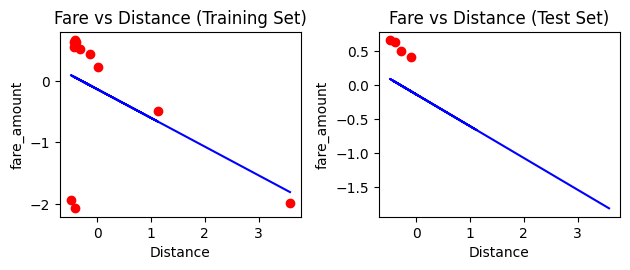

In [54]:
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")
plt.tight_layout()
plt.show()

In [55]:
cols = ['Model', 'RMSE', 'R-Squared']
# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)
# compile the required information
linreg_metrics = pd.DataFrame([[
"Linear Regresion model",
np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
np.sqrt(metrics.r2_score(y_test, y_pred))
]], columns = cols)
result_tabulation = pd.concat([result_tabulation, linreg_metrics], ignore_index=True)
result_tabulation

C:\Users\HP\AppData\Local\Temp\ipykernel_25560\3905207923.py:9: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(metrics.r2_score(y_test, y_pred))


,Model,RMSE,R-Squared
0,Linear Regresion model,0.5476,NaN


In [56]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)
# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Temp\ipykernel_25560\3010055642.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=10)

In [57]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(X_test)
result = pd.DataFrame()
result[['Actual']] = y_test
result['Predicted'] = y_pred_RF
result.sample(10)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RF))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred_RF))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred_RF)))

Mean Absolute Error: 0.6919692511652538
Mean Absolute % Error: 1.1042050999038897
Mean Squared Error: 0.874835488256728
Root Mean Squared Error: 0.935326407334214
R Squared (R²): nan


C:\Users\HP\AppData\Local\Temp\ipykernel_25560\1153566439.py:5: RuntimeWarning: invalid value encountered in sqrt
  print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred_RF)))


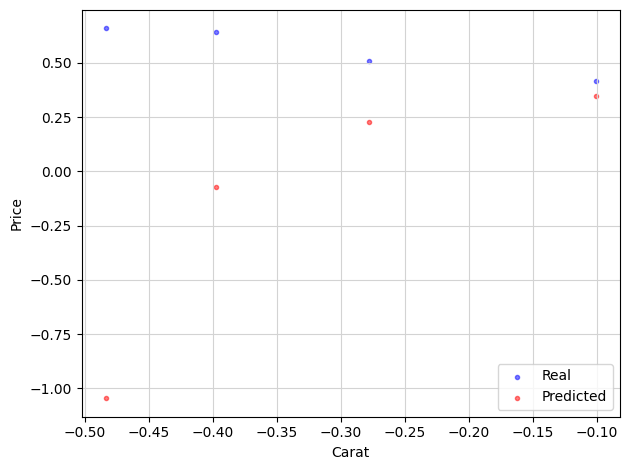

In [59]:
# Build scatterplot
plt.scatter(X_test, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(X_test, y_pred_RF, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [60]:
# compile the required information
random_forest_metrics = pd.DataFrame([[
"Random Forest Regressor model",
np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)),
np.sqrt(metrics.r2_score(y_test, y_pred_RF))
]], columns = cols)
result_tabulation = pd.concat([result_tabulation, random_forest_metrics], ignore_index=True)
result_tabulation

C:\Users\HP\AppData\Local\Temp\ipykernel_25560\2636426006.py:5: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(metrics.r2_score(y_test, y_pred_RF))


,Model,RMSE,R-Squared
0,Linear Regresion model,0.547600,NaN
1,Random Forest Regressor model,0.935326,NaN
